# Kmeans Algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv("crime_data.csv")

In [4]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
df=df.iloc[:,1:]

### Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc=StandardScaler()

In [8]:
x=sc.fit_transform(df)

In [9]:
km=KMeans()
y=km.fit_predict(x)
y

array([6, 7, 5, 1, 2, 2, 3, 1, 5, 6, 3, 4, 5, 1, 4, 1, 1, 6, 4, 5, 3, 5,
       4, 6, 1, 1, 4, 2, 4, 3, 5, 5, 6, 0, 3, 1, 1, 3, 3, 6, 0, 6, 5, 3,
       0, 1, 3, 0, 4, 1])

### Visualizing the data frame

In [10]:
df['cluster']=y
df.head()

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,6
1,10.0,263,48,44.5,7
2,8.1,294,80,31.0,5
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,2


#### Elbow Graph

In [11]:
wcss=[]
for i in range(1,21):
    km=KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)
    

In [12]:
wcss

[200.0,
 104.96163315756871,
 80.08569526137276,
 57.55425863091104,
 50.05119672966492,
 44.478981560025595,
 40.587841964225746,
 35.58121206164852,
 32.406221556477064,
 28.63003290052419,
 24.79755409754057,
 22.40949100809986,
 20.67686228811241,
 19.293361583819745,
 18.34571822591376,
 16.88440295894574,
 15.093868234254241,
 14.63444532222588,
 13.957689116947957,
 13.38146474356525]

Text(0, 0.5, 'wcss value')

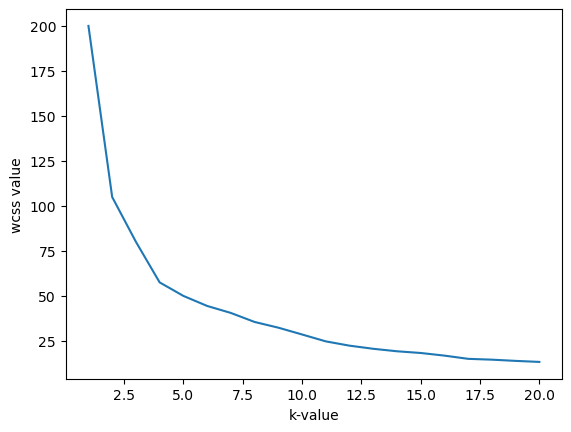

In [13]:
plt.plot(range(1,21),wcss)
plt.xlabel('k-value')
plt.ylabel('wcss value')

In [14]:
# from the above elbow graph we can draw 4 cluster as the elbow graph edge curve is near to 4

## Final Model

In [15]:
km=KMeans(n_clusters=4)
y=km.fit_predict(x)
y

array([2, 3, 3, 2, 3, 3, 0, 0, 3, 2, 0, 1, 3, 0, 1, 0, 1, 2, 1, 3, 0, 3,
       1, 2, 3, 1, 1, 3, 1, 0, 3, 3, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 3, 0,
       1, 0, 0, 1, 1, 0])

In [16]:
df['cluster']=y

In [17]:
data=pd.DataFrame(x,columns=['Murder','Assault','UrbanPop','Rape'])

In [18]:
data['cluster']=y

In [19]:
km.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383]])

In [20]:
data.head(2)

,Murder,Assault,UrbanPop,Rape,cluster
0,1.255179,0.790787,-0.526195,-0.003451,2
1,0.513019,1.118060,-1.224067,2.509424,3


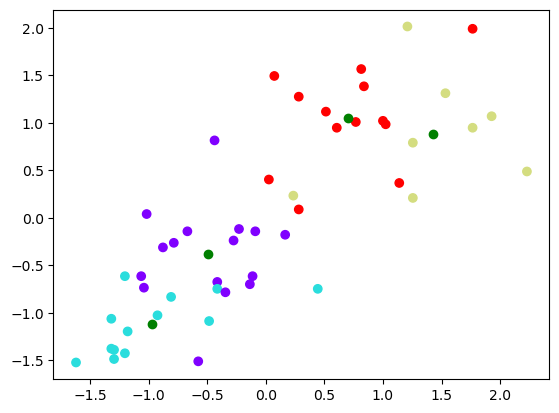

In [21]:
plt.scatter(x=data['Murder'],y=data['Assault'],c=data['cluster'],cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='green')

### Evaluation of KMeans

In [22]:
from sklearn.metrics import silhouette_score

In [23]:
silhouette_score(x,y)

0.33968891433344395

In [24]:
from yellowbrick.cluster import SilhouetteVisualizer

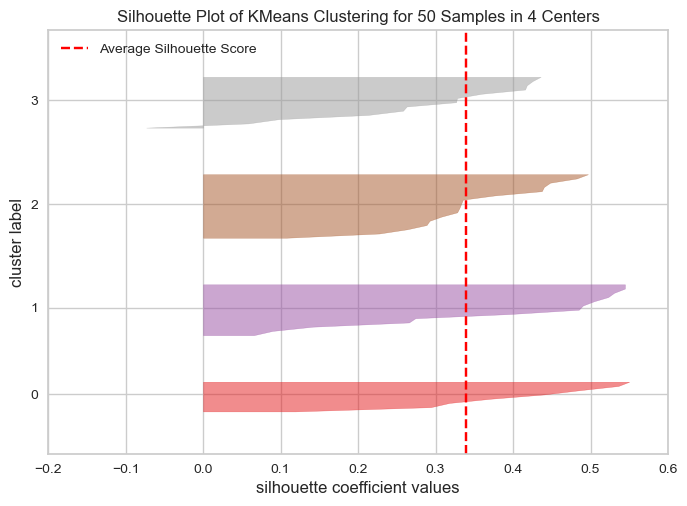

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 50 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [25]:
model=KMeans(n_clusters=4)
vis=SilhouetteVisualizer(model)
vis.fit(x)
vis.show()